In [3]:
import warnings
warnings.filterwarnings('ignore')

# 10장 설문지 분석을 위한 자연어처리 테크닉 10

### 테크닉 91 : 데이터를 불러서 파악해보자

In [4]:
import pandas as pd
survey = pd.read_csv("survey.csv")
print(len(survey))
survey.head(40)

86


,datetime,comment,satisfaction
0,2019-03-11,역앞에 젊은이들이 모여있다(AA역),1
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5
2,2019-02-18,육아 지원이 좋다,5
3,2019-04-09,어린이집에 바로 입원할 수 있다(대기아동 없음),4
4,2019-01-06,역앞 상가가 쓸쓸하다,2
5,2019-01-12,생활은 편리하지만 놀만한 장소가 없다,3
6,2019-02-02,놀 장소가 없다,2
7,2019-04-06,상업시설이 좀 더 있었으면 좋겠다,3
8,2019-04-17,병원이 충분하다,4
9,2019-03-07,사이클링 코스가 좋다,5


In [5]:
survey.isna().sum()

datetime        0
comment         2
satisfaction    0
dtype: int64

In [6]:
survey = survey.dropna()
survey.isna().sum()

datetime        0
comment         0
satisfaction    0
dtype: int64

### 테크닉 92 : 불필요한 문자를 제거하자

In [7]:
survey["comment"] = survey["comment"].str.replace("AA", "")
survey.head()

,datetime,comment,satisfaction
0,2019-03-11,역앞에 젊은이들이 모여있다(역),1
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5
2,2019-02-18,육아 지원이 좋다,5
3,2019-04-09,어린이집에 바로 입원할 수 있다(대기아동 없음),4
4,2019-01-06,역앞 상가가 쓸쓸하다,2


In [8]:
survey["comment"] = survey["comment"].str.replace("\(.+?\)", "")
survey.head()

,datetime,comment,satisfaction
0,2019-03-11,역앞에 젊은이들이 모여있다,1
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5
2,2019-02-18,육아 지원이 좋다,5
3,2019-04-09,어린이집에 바로 입원할 수 있다,4
4,2019-01-06,역앞 상가가 쓸쓸하다,2


### 테크닉 93 : 문자수를 세어 히스토그램으로 표시해보자

In [9]:
survey["length"] = survey["comment"].str.len()
survey.head()

,datetime,comment,satisfaction,length
0,2019-03-11,역앞에 젊은이들이 모여있다,1,14
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5,21
2,2019-02-18,육아 지원이 좋다,5,9
3,2019-04-09,어린이집에 바로 입원할 수 있다,4,17
4,2019-01-06,역앞 상가가 쓸쓸하다,2,11


(array([20., 19., 20., 10.,  7.,  3.,  3.,  1.,  0.,  1.]),
 array([ 6. , 11.6, 17.2, 22.8, 28.4, 34. , 39.6, 45.2, 50.8, 56.4, 62. ]),
 <a list of 10 Patch objects>)

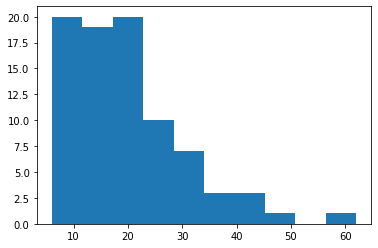

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(survey["length"])

### 테크닉 94 : 형태소분석으로 문장을 분해해보자

In [11]:
from konlpy.tag import Twitter
twt = Twitter()
text = "형태소분석으로 문장을 분해해보자"
tagging = twt.pos(text)
tagging

[('형태소', 'Noun'),
 ('분석', 'Noun'),
 ('으로', 'Josa'),
 ('문장', 'Noun'),
 ('을', 'Josa'),
 ('분해', 'Noun'),
 ('해보자', 'Verb')]

In [12]:
words = twt.pos(text)
words_arr = []
for i in words:
    if i == 'EOS': continue
    word_tmp = i[0]
    words_arr.append(word_tmp)
words_arr

['형태소', '분석', '으로', '문장', '을', '분해', '해보자']

### 테크닉 95 : 형태소분석으로 문장에서 「동사, 명사」를 추출해보자

In [13]:
text = "형태소분석으로 문장을 분해해보자"
words_arr = []
parts = ["Noun", "Verb"]
words = twt.pos(text)
words_arr = []
for i in words:
    if i == 'EOS' or i == '': continue
    word_tmp = i[0]
    part = i[1]
    if not (part in parts):continue
    words_arr.append(word_tmp)
words_arr

['형태소', '분석', '문장', '분해', '해보자']

### 테크닉 96 : 형태소분석으로 자주나오는 명사를 확인해보자

In [14]:
all_words = []
parts = ["Noun"]
for n in range(len(survey)):
    text = survey["comment"].iloc[n]
    words = twt.pos(text)
    words_arr = []
    for i in words:
        if i == "EOS" or i == "": continue
        word_tmp = i[0]
        part = i[1]
        if not (part in parts):continue
        words_arr.append(word_tmp)
    all_words.extend(words_arr)
print(all_words)

['역앞', '젊은이', '운동', '수', '장소', '것', '육아', '지원이', '어린이집', '바로', '입원', '수', '역앞', '상가', '생활', '놀', '장소', '놀', '장소', '상업시설', '좀', '더', '병원', '사이클링', '코스', '축제', '좀', '더', '성대', '초등학교', '공원', '더', '근처', '공원', '살기', '슈퍼', '육아', '데이트', '명소', '상가', '좀', '더', '밤길', '쓰레기', '처리', '영화관', '가로수', '더', '공원', '추가', '관광', '명소', '육아', '최고', '길이', '시내', '접근성', '집세', '합리', '의', '교통', '체증', '게', '해', '상가', '지붕', '비', '큰일', '상가', '더', '카페', '스포츠', '센터', '자주', '이용', '스포츠', '센터', '이용', '요금', '워킹맘', '지원', '더', '버스', '별로', '안', '자전거', '달리기', '달리기', '운동', '수', '장소', '기업', '역앞', '주차장', '아저씨', '말', '적', '경찰', '순찰', '더', '소방', '활동', '수', '재난', '시', '피난', '장소', '것', '요즘', '강', '범람', '피해', '크게', '이', '도시', '범람', '방지', '취하', '설명', '신호등', '사거리', '때문', '사고', '신호', '상가', '활성화', '활동', '좀더', '행정', '뒷받침', '아이', '놀', '장소', '역앞', '자전거', '주차장', '가로수', '낙엽', '청소', '가로수', '재해', '시', '비축', '상황', '보도', '길이', '수', '지역', '자치', '단체', '더', '지원', '자치', '단체', '활동', '안심', '살', '수', '관광지', '최근', '지방', '넘버', '치안', '제대로', '주차장', '수가', '요금'

In [15]:
all_words_df = pd.DataFrame({"words":all_words, "count":len(all_words)*[1]})
all_words_df = all_words_df.groupby("words").sum()
all_words_df.sort_values("count",ascending=False).head()

,count
words,
더,14
수,7
장소,6
주차장,5
좀,5


### 테크닉 97 : 관계없는 단어를 제거해보자

In [16]:
stop_words = ["더","수","좀"]
all_words = []
parts = ["Noun"]
for n in range(len(survey)):
    text = survey["comment"].iloc[n]
    words = twt.pos(text)
    words_arr = []
    for i in words:
        if i == "EOS" or i == "": continue
        word_tmp = i[0]
        part = i[1]
        if not (part in parts):continue
        if word_tmp in stop_words:continue
        words_arr.append(word_tmp)
    all_words.extend(words_arr)
print(all_words)

['역앞', '젊은이', '운동', '장소', '것', '육아', '지원이', '어린이집', '바로', '입원', '역앞', '상가', '생활', '놀', '장소', '놀', '장소', '상업시설', '병원', '사이클링', '코스', '축제', '성대', '초등학교', '공원', '근처', '공원', '살기', '슈퍼', '육아', '데이트', '명소', '상가', '밤길', '쓰레기', '처리', '영화관', '가로수', '공원', '추가', '관광', '명소', '육아', '최고', '길이', '시내', '접근성', '집세', '합리', '의', '교통', '체증', '게', '해', '상가', '지붕', '비', '큰일', '상가', '카페', '스포츠', '센터', '자주', '이용', '스포츠', '센터', '이용', '요금', '워킹맘', '지원', '버스', '별로', '안', '자전거', '달리기', '달리기', '운동', '장소', '기업', '역앞', '주차장', '아저씨', '말', '적', '경찰', '순찰', '소방', '활동', '재난', '시', '피난', '장소', '것', '요즘', '강', '범람', '피해', '크게', '이', '도시', '범람', '방지', '취하', '설명', '신호등', '사거리', '때문', '사고', '신호', '상가', '활성화', '활동', '좀더', '행정', '뒷받침', '아이', '놀', '장소', '역앞', '자전거', '주차장', '가로수', '낙엽', '청소', '가로수', '재해', '시', '비축', '상황', '보도', '길이', '지역', '자치', '단체', '지원', '자치', '단체', '활동', '안심', '살', '관광지', '최근', '지방', '넘버', '치안', '제대로', '주차장', '수가', '요금', '역', '앞', '공공', '주차장', '보행자', '용', '신호', '노인', '어린이', '생각', '설정', '급행', '시내', '버스', '노선'

In [17]:
all_words_df = pd.DataFrame({"words":all_words, "count":len(all_words)*[1]})
all_words_df = all_words_df.groupby("words").sum()
all_words_df.sort_values("count",ascending=False).head()

,count
words,
장소,6
주차장,5
상가,5
역앞,5
공원,5


### 테크닉 98 : 고객만족도와 자주나오는 단어의 관계를 살펴보자

In [18]:
stop_words = ["더","수","좀"]
parts = ["Noun"]
all_words = []
satisfaction = []
for n in range(len(survey)):
    text = survey["comment"].iloc[n]
    words = twt.pos(text)
    words_arr = []
    for i in words:
        if i == "EOS" or i == "": continue
        word_tmp = i[0]
        part = i[1]
        if not (part in parts):continue
        if word_tmp in stop_words:continue
        words_arr.append(word_tmp)
        satisfaction.append(survey["satisfaction"].iloc[n])
    all_words.extend(words_arr)
all_words_df = pd.DataFrame({"words":all_words, "satisfaction":satisfaction, "count":len(all_words)*[1]})
all_words_df.head(30)

,words,satisfaction,count
0,역앞,1,1
1,젊은이,1,1
2,운동,5,1
3,장소,5,1
4,것,5,1
5,육아,5,1
6,지원이,5,1
7,어린이집,4,1
8,바로,4,1
9,입원,4,1


In [19]:
words_satisfaction = all_words_df.groupby("words").mean()["satisfaction"]
words_count = all_words_df.groupby("words").sum()["count"]
words_df = pd.concat([words_satisfaction, words_count], axis=1)
words_df.head()

,satisfaction,count
words,,
가로수,1.666667,3
강,3.000000,1
거리,5.000000,1
걱정,2.000000,1
걸,2.000000,1


In [20]:
words_df = words_df.loc[words_df["count"]>=3]
words_df.sort_values("satisfaction", ascending=False).head()

,satisfaction,count
words,,
육아,4.333333,3
관공서,3.500000,4
길이,3.500000,4
활동,3.333333,3
장소,3.000000,6


In [21]:
words_df.sort_values("satisfaction").head()

,satisfaction,count
words,,
주차장,1.000000,5
역앞,1.200000,5
가로수,1.666667,3
놀,2.000000,3
지원,2.000000,3


### 테크닉 99 : 의견을 특징으로 표현해보자

In [22]:
parts = ["Noun"]
all_words_df = pd.DataFrame()
satisfaction = []
for n in range(len(survey)):
    text = survey["comment"].iloc[n]
    words = twt.pos(text)
    words_df = pd.DataFrame()
    for i in words:
        if i == "EOS" or i == "": continue
        word_tmp = i[0]
        part = i[1]
        if not (part in parts):continue
        words_df[word_tmp] = [1]
    all_words_df = pd.concat([all_words_df, words_df] ,ignore_index=True)
all_words_df.head()

,역앞,젊은이,운동,수,장소,것,육아,지원이,어린이집,바로,...,걸,야간,불안,고령자,운동장,잔디밭,아주,설문지,투고,놀이기구
0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
all_words_df = all_words_df.fillna(0)
all_words_df.head()

,역앞,젊은이,운동,수,장소,것,육아,지원이,어린이집,바로,...,걸,야간,불안,고령자,운동장,잔디밭,아주,설문지,투고,놀이기구
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 테크닉 100 : 비슷한 설문지를 찾아보자

In [24]:
print(survey["comment"].iloc[2])
target_text = all_words_df.iloc[2]
print(target_text)

육아 지원이 좋다
역앞      0.0
젊은이     0.0
운동      0.0
수       0.0
장소      0.0
       ... 
잔디밭     0.0
아주      0.0
설문지     0.0
투고      0.0
놀이기구    0.0
Name: 2, Length: 187, dtype: float64


In [25]:
import numpy as np
cos_sim = []
for i in range(len(all_words_df)):
    cos_text = all_words_df.iloc[i]
    cos = np.dot(target_text, cos_text) / (np.linalg.norm(target_text) * np.linalg.norm(cos_text))
    cos_sim.append(cos)
all_words_df["cos_sim"] = cos_sim
all_words_df.sort_values("cos_sim",ascending=False).head()

,역앞,젊은이,운동,수,장소,것,육아,지원이,어린이집,바로,...,야간,불안,고령자,운동장,잔디밭,아주,설문지,투고,놀이기구,cos_sim
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
15,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707107
24,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000
55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [26]:
print(survey["comment"].iloc[2])
print(survey["comment"].iloc[15])
print(survey["comment"].iloc[24])

육아 지원이 좋다
육아가 쉽다
육아하기에는 최고
